In [10]:
import pyathena as pa
import sys
import os
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

sys.path.insert(0,'..')


In [11]:
data = pa.LoadSim('/home/comejuliet/TIGRESS', verbose = True)

LoadSim-INFO: savdir : /home/comejuliet/TIGRESS
LoadSim-INFO: basedir: /home/comejuliet/TIGRESS
LoadSim-INFO: athinput: /home/comejuliet/TIGRESS/out.txt
LoadSim-INFO: problem_id: R8_8pc_NCRSP
LoadSim-INFO: timeit.txt not found.
LoadSim-INFO: hst: /home/comejuliet/TIGRESS/hst/R8_8pc_NCRSP.hst
LoadSim-INFO: sn: /home/comejuliet/TIGRESS/hst/R8_8pc_NCRSP.sn
LoadSim-INFO: vtk in tar: /home/comejuliet/TIGRESS/vtk nums: 200-390
LoadSim-INFO: starpar_vtk: /home/comejuliet/TIGRESS/starpar nums: 0-438
LoadSim-WARNING: zprof files not found in /home/comejuliet/TIGRESS.
LoadSim-WARNING: rst files not found in /home/comejuliet/TIGRESS.


In [12]:
data.print_all_properties()

Attributes:
 ['basedir', 'basename', 'load_method', 'loglevel_def', 'logger', 'savdir', '_out_fmt_def', 'files', 'par', 'out_fmt', 'problem_id', 'nums', 'nums_id0', 'nums_tar', 'nums_starpar', '_fmt_vtk2d_not_found', 'domain', 'config_time', 'u', 'dfi']

Methods:
Decorators: Class containing a collection of decorators for prompt reading of analysis
        output, (reprocessed) hst, and zprof. Used in child classes.

        
-------------------------
_find_files: Function to find all output files under basedir and create "files" dictionary.

        hst: problem_id.hst
        sn: problem_id.sn (file format identical to hst)
        vtk: problem_id.num.vtk
        vtk_tar: problem_id.num.tar
        starpar_vtk: problem_id.num.starpar.vtk
        zprof: problem_id.num.phase.zprof
        timeit: timtit.txt
        
-------------------------
_find_match: None
-------------------------
_get_domain_from_par: Get domain info from par['domain1']. Time is set to None.
        
-------------

In [13]:
print(data.basedir, data.basename, data.problem_id, data.load_method)

/home/comejuliet/TIGRESS TIGRESS R8_8pc_NCRSP pyathena


In [14]:
print(data.files.keys())

dict_keys(['athinput', 'hst', 'sn', 'vtk', 'vtk_id0', 'vtk_tar', 'starpar_vtk'])


In [15]:
data.files['hst']

'/home/comejuliet/TIGRESS/hst/R8_8pc_NCRSP.hst'

In [16]:
print(data.par.keys()) # input parameter blocks (read from out.txt (stdout) of the simulation)

dict_keys(['job', 'log', 'output1', 'output2', 'output3', 'output4', 'output5', 'time', 'domain1', 'problem', 'feedback', 'cooling', 'opacity', 'radps', 'configure'])


In [17]:
data.par['cooling'] # domain parameters

{'f_newdt': 0.0,
 'T1floor': 3.0,
 'f_cool': 0.1,
 'Erad_PE0': 7.613e-14,
 'Erad_LW0': 1.335e-14,
 'iCR_attenuation': 2,
 'iCR_variation': 1,
 'iFUV_pp_approx': 1,
 'NH0_CR': 9.35e+20,
 'kgr_H2': 3e-17,
 'xCstd': 0.00016,
 'xOstd': 0.00032,
 'plane_parallel': 1,
 'agemax_rad_pp': 20.0,
 'iPEheating': 1,
 'ikgr_H2': 1,
 'iCoolDust': 0,
 'iCoolH2rovib': 1,
 'iCoolHISmith21': 0,
 'chi_FUV_bg': 0.0,
 'Thot0': 20000.0,
 'Thot1': 35000.0,
 'idt_sub_cool': 0,
 'xi_diss_H2_ISRF': 5.7e-11,
 'iTemp_xneu': 0,
 'iCoolH2colldiss': 1,
 'iCoolHCIE': 0,
 'iCRPhotC': 1,
 'iCII_rec_rate': 0,
 'iH2heating': 0}

In [18]:
data.par['problem']

{'gamma': 1.66666667,
 'surf': 12.0,
 'sz0': 10,
 'vturb': 10,
 'beta': 1,
 'qshear': 1.0,
 'Omega': 0.028,
 'SurfS': 42.0,
 'zstar': 245.0,
 'rhodm': 0.0064,
 'R0': 8000,
 'Sigma_SFR': 0.005,
 'pattern': 0.5,
 'marm': 2,
 'F0': 0.2,
 'tmax_sp': 100,
 'Z_gas': 1.0,
 'Z_dust': 1.0,
 'xi_CR_amp': 1.0,
 'rho_crit': 1.0,
 'starpar_iacc': 0,
 'muH': 1.4,
 'Sigma_gas0': 10.0,
 'Sigma_SFR0': 0.0025}

In [19]:
data.domain # dictionary containing essential domain info ; le/re means left/right edge

{'Nx': array([256, 512, 768]),
 'ndim': 3,
 'le': array([-1024, -2048, -3072]),
 're': array([1024, 2048, 3072]),
 'Lx': array([2048, 4096, 6144]),
 'dx': array([8., 8., 8.]),
 'center': array([0., 0., 0.]),
 'time': None}

In [20]:
2048/256

8.0

In [21]:
hst = pa.read_hst(data.files['hst']) # pandas DataFrame
hst.columns

Index(['time', 'dt', 'mass', 'totalE', 'x1Mom', 'x2Mom', 'x3Mom', 'x1KE',
       'x2KE', 'x3KE', 'x1ME', 'x2ME', 'x3ME', 'gravPE', 'scalar0', 'scalar1',
       'scalar2', 'scalar3', 'scalar4', 'dmasssink', 'dM1sink', 'dM2sink',
       'dM3sink', 'dEsink', 'heat_ratio', 'heat_ratio_mid',
       'heat_ratio_mid_2p', 'ftau', 'x2dke', 'nmid', 'Pth_mid', 'Pturb_mid',
       'Vmid_2p', 'nmid_2p', 'Pth_mid_2p', 'Pturb_mid_2p', 'sfr10', 'sfr40',
       'sfr100', 'msp', 'metal_sp', 'total_ecool', 'total_eheat', 'total_enet',
       'V_Erad_PH', 'Lmasked_HI_PH', 'Lmasked_H2_PH', 'Lmasked_dust_PH',
       'Lmasked_dust_LW', 'Lmasked_dust_PE', 'phot_rate_HI', 'phot_rate_H2',
       'rec_rate_rad_HII', 'rec_rate_gr_HII', 'xi_CR0', 'Ltot0', 'Ltot1',
       'Ltot2', 'Ltot3', 'Lesc0', 'Lesc1', 'Lesc2', 'Lesc3', 'Ldust0',
       'Ldust1', 'Ldust2', 'Ldust3', 'Lxymax0', 'Lxymax1', 'Lxymax2',
       'Lxymax3', 'Lpp0', 'Lpp1', 'Lpp2', 'Lpp3'],
      dtype='object')

In [22]:
starpar = pa.

SyntaxError: invalid syntax (1380760006.py, line 1)

In [23]:
hst.head()

,time,dt,mass,totalE,x1Mom,x2Mom,x3Mom,x1KE,x2KE,x3KE,...,Ldust2,Ldust3,Lxymax0,Lxymax1,Lxymax2,Lxymax3,Lpp0,Lpp1,Lpp2,Lpp3
0,0.000000,0.000002,0.056410,379.500797,0.514835,6.317976,4.409089e-16,5.356182,364.185343,2.804502,...,1.224774e+13,2567.618512,0.0,4.803977e+10,6.088787e+11,5.938841e+12,0.0,1.021891e+12,5.223778e+12,1.212286e+13
1,0.012432,0.005816,0.056411,379.614562,0.514821,6.318004,-1.212310e-05,5.368513,364.200879,2.816455,...,1.224774e+13,2567.618512,0.0,4.803977e+10,6.088787e+11,5.938841e+12,0.0,1.021891e+12,5.223778e+12,1.212286e+13
2,0.024296,0.004921,0.056411,379.557824,0.514809,6.318029,-1.193101e-05,5.365648,364.201506,2.814855,...,1.220129e+13,2556.276006,0.0,4.831323e+10,6.096473e+11,5.924890e+12,0.0,1.024094e+12,5.223760e+12,1.209219e+13
3,0.034468,0.005504,0.056411,379.469277,0.514809,6.318051,-1.058450e-05,5.362375,364.201165,2.810499,...,1.213016e+13,2538.618221,0.0,4.846776e+10,6.099824e+11,5.903152e+12,0.0,1.029670e+12,5.230060e+12,1.204903e+13
4,0.044668,0.004930,0.056411,379.496898,0.514816,6.318071,-1.464296e-05,5.370328,364.211810,2.817250,...,1.213016e+13,2538.618221,0.0,4.846776e+10,6.099824e+11,5.903152e+12,0.0,1.029670e+12,5.230060e+12,1.204903e+13


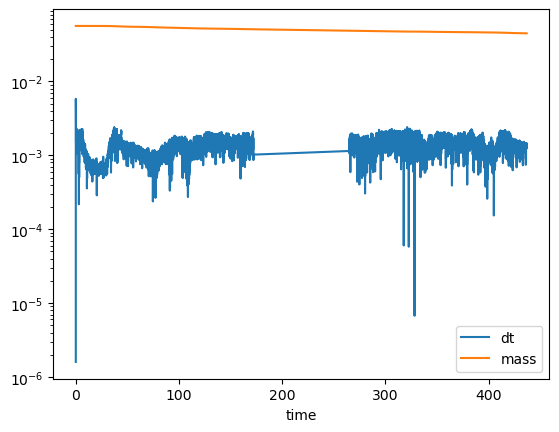

In [24]:
ax = hst.plot('time',y=['dt','mass']) # dt_mhd and gas mass in code units
ax.set_yscale('log')

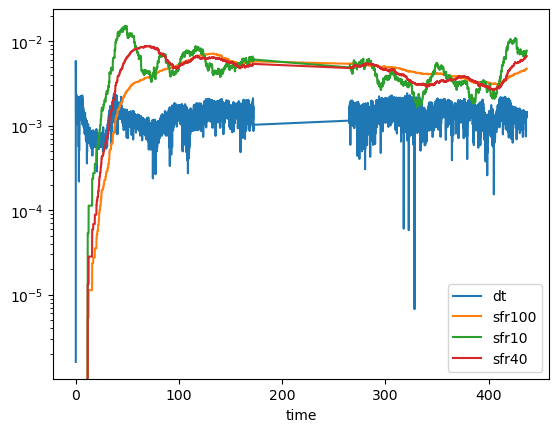

In [25]:
ax = hst.plot('time',y=['dt','sfr100','sfr10','sfr40'])
ax.set_yscale('log')

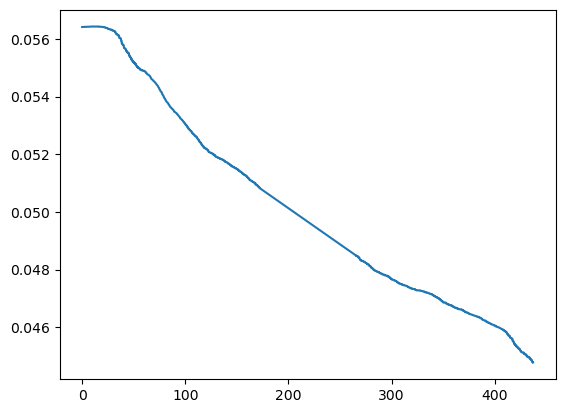

In [26]:
plt.plot(hst['time'], hst['mass'])

In [27]:
print(data.nums)

[200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390]


In [28]:
num = data.nums[5]
ddata = data.load_vtk(num=num)

LoadSim-INFO: [load_vtk_tar]: R8_8pc_NCRSP.0250.tar. Time: 250.000600


In [29]:
help(ddata)

Help on AthenaDataSetTar in module pyathena.io.read_vtk_tar object:

class AthenaDataSetTar(pyathena.io.read_vtk.AthenaDataSet)
 |  AthenaDataSetTar(filename, id0_only=False, units=<pyathena.util.units.Units object at 0x7fabf8a0ead0>, dfi=None)
 |  
 |  Method resolution order:
 |      AthenaDataSetTar
 |      pyathena.io.read_vtk.AthenaDataSet
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, id0_only=False, units=<pyathena.util.units.Units object at 0x7fabf8a0ead0>, dfi=None)
 |      Class to read athena vtk file.
 |      
 |      Parameters
 |      ----------
 |      filename : string
 |          Name of the file to open, including extension
 |      id0_only : bool
 |          Flag to enforce to read vtk file in id0 directory only.
 |          Default value is False.
 |      units : Units
 |          pyathena Units object (used for reading derived fields)
 |      dfi : dict
 |          Dictionary containing derived fields info
 |  
 |  --------

In [30]:
ddata.domain

{'all_grid_equal': True,
 'ngrid': 768,
 'le': array([-1024., -2048., -3072.], dtype=float32),
 're': array([1024., 2048., 3072.], dtype=float32),
 'dx': array([8., 8., 8.], dtype=float32),
 'Lx': array([2048., 4096., 6144.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([256, 512, 768]),
 'ndim': 3,
 'time': 250.0006}

In [31]:
help(ddata.get_field) # Note: setting (le, re) manually does not work perfectly

Help on method get_field in module pyathena.io.read_vtk:

get_field(field='density', le=None, re=None, as_xarray=True) method of pyathena.io.read_vtk_tar.AthenaDataSetTar instance
    Read 3d fields data.
    
    Parameters
    ----------
    field : (list of) string
        The name of the field(s) to be read.
    le : sequence of floats
       Left edge. Default value is the domain left edge.
    re : sequence of floats
       Right edge. Default value is the domain right edge.
    as_xarray : bool
       If True, returns results as an xarray Dataset. If False, returns a
       dictionary containing numpy arrays. Default value is True.
    
    Returns
    -------
    dat : xarray dataset
        An xarray dataset containing fields.



In [32]:
ddata.dirname, ddata.ext

('/home/comejuliet/TIGRESS/vtk', 'tar')

In [33]:
# field names extracted from the raw vtk file
# velocity, magnetic_fields are vectors
print(ddata.field_list)

['density', 'velocity', 'pressure', 'cell_centered_B', 'gravitational_potential', 'temperature', 'heat_rate', 'cool_rate', 'net_cool_rate', 'CR_ionization_rate', 'rad_energy_density_PH', 'rad_energy_density_LW', 'rad_energy_density_PE', 'rad_energy_density_PE_unatt', 'rad_energy_density_LW_diss', 'specific_scalar[0]', 'specific_scalar[1]', 'xHI', 'xH2', 'xe']


In [36]:
print(ddata.derived_field_list)

['rho', 'nH', 'pok', 'r', 'vmag', 'vr', 'vx', 'vy', 'vz', 'cs', 'csound', 'Mr', 'Mr_abs', 'T', 'Td', 'cool_rate', 'heat_rate', 'net_cool_rate', 'Lambda_cool', 'nHLambda_cool', 'nHLambda_cool_net', 'Gamma_heat', 't_cool', 'vAmag', 'vAx', 'vAy', 'vAz', 'Bx', 'By', 'Bz', 'Bmag', 'nH2', '2nH2', 'xH2', '2xH2', 'nHI', 'xHI', 'nHII', 'xHII', 'nHn', 'xn', 'ne', 'nesq', 'xe', 'xCI', 'nCI', 'xOII', 'xCII', 'xCII_alt', 'xi_CR', 'T_alt', 'chi_PE', 'chi_LW', 'chi_FUV', 'Erad_LyC', 'Uion', 'j_Halpha', 'Erad_FUV', 'heat_ratio', 'NHeff', 'heat_rate_HI_phot', 'heat_rate_H2_phot', 'heat_rate_dust_LyC', 'heat_rate_dust_FUV', 'heat_rate_dust_UV', 'psi_gr', 'eps_pe', 'Gamma_pe', 'chi_H2', 'chi_CI', 'fshld_H2', 'j_X']


In [37]:
eq_curve = ddata.get_field(['T','Lambda_cool','Gamma_heat'])

ValueError: x and y can be no greater than 2D, but have shapes (768, 512, 256) and (768, 512, 256)

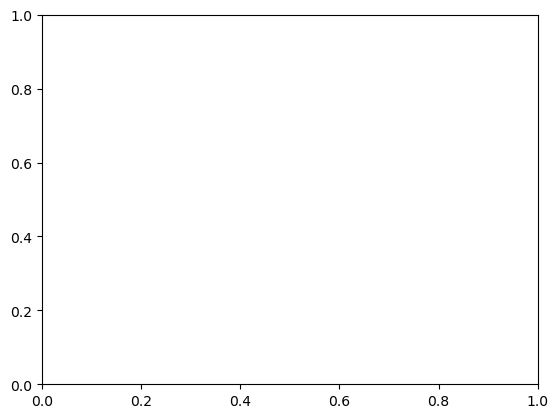

In [38]:
plt.plot(eq_curve.T,eq_curve.Lambda_cool)

In [25]:
d = ddata.get_field(['density','pressure','velocity'])

In [26]:
d.keys()

KeysView(<xarray.Dataset>
Dimensions:    (z: 768, y: 512, x: 256)
Coordinates:
  * x          (x) float64 -1.02e+03 -1.012e+03 ... 1.012e+03 1.02e+03
  * y          (y) float64 -2.044e+03 -2.036e+03 ... 2.036e+03 2.044e+03
  * z          (z) float64 -3.068e+03 -3.06e+03 ... 3.06e+03 3.068e+03
Data variables:
    density    (z, y, x) float32 3.99e-05 4.048e-05 ... 9.599e-05 9.462e-05
    pressure   (z, y, x) float32 3.94 3.957 3.973 3.989 ... 4.087 4.063 4.044
    velocity1  (z, y, x) float32 -16.01 -13.84 -11.87 ... -11.19 -9.428 -7.638
    velocity2  (z, y, x) float32 145.1 138.6 134.3 132.8 ... 95.08 94.1 92.25
    velocity3  (z, y, x) float32 -72.98 -75.06 -79.28 ... 121.5 125.1 128.9
Attributes:
    all_grid_equal:  True
    ngrid:           768
    le:              [-1024. -2048. -3072.]
    re:              [1024. 2048. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [2048. 4096. 6144.]
    center:          [0. 0. 0.]
    Nx:              [256 512 768]
    ndim:      

In [27]:
type(d['density']), d['density'].shape, d['velocity1'].shape

(xarray.core.dataarray.DataArray, (768, 512, 256), (768, 512, 256))

In [28]:
d = ddata.get_field(['density','T','nH','rho','vz','vx','Bmag'])
d

<xarray.Dataset>
Dimensions:  (z: 768, y: 512, x: 256)
Coordinates:
  * x        (x) float64 -1.02e+03 -1.012e+03 -1.004e+03 ... 1.012e+03 1.02e+03
  * y        (y) float64 -2.044e+03 -2.036e+03 ... 2.036e+03 2.044e+03
  * z        (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    density  (z, y, x) float32 3.99e-05 4.048e-05 ... 9.599e-05 9.462e-05
    nH       (z, y, x) float32 3.99e-05 4.048e-05 ... 9.599e-05 9.462e-05
    vz       (z, y, x) float32 -72.98 -75.06 -79.28 -85.27 ... 121.5 125.1 128.9
    T        (z, y, x) float32 7.286e+06 7.214e+06 ... 3.124e+06 3.155e+06
    Bmag     (z, y, x) float32 0.2488 0.2464 0.2432 ... 0.2411 0.2273 0.2165
    rho      (z, y, x) float32 9.35e-29 9.486e-29 ... 2.249e-28 2.217e-28
    vx       (z, y, x) float32 -16.01 -13.84 -11.87 ... -11.19 -9.428 -7.638
Attributes:
    all_grid_equal:  True
    ngrid:           768
    le:              [-1024. -2048. -3072.]
    re:              [1024. 2048. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [2048. 4096. 6144.]
    center:          [0. 0. 0.]
    Nx:              [256 512 768]
    ndim:            3
    time:            250.0006
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

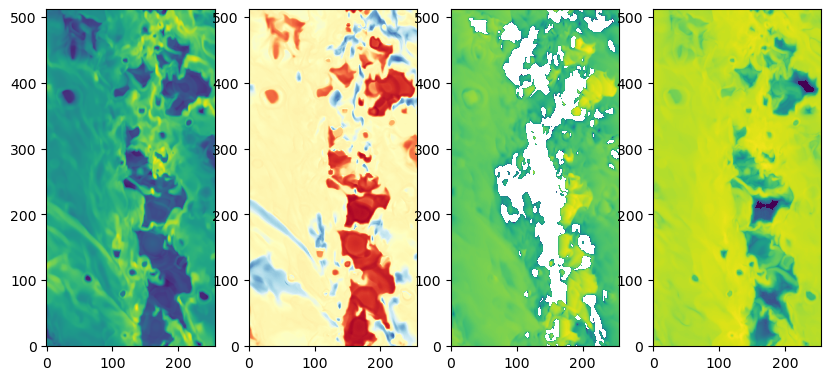

In [29]:
iz = ddata.domain['Nx'][2] // 2
fig, axes = plt.subplots(1, 4, figsize=(10,5))
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)
axes[0].imshow(d['nH'][iz,:,:], norm=LogNorm(), origin='lower')
axes[1].imshow(d['T'][iz,:,:], norm=LogNorm(), origin='lower', 
               cmap=cmap_temp)
axes[2].imshow(d['vx'][iz,:,:], norm=LogNorm(), origin='lower')
axes[3].imshow(d['Bmag'][iz,:,:], norm=LogNorm(), origin='lower')

In [30]:
d = ddata.get_field(['density','T','nH','rho','vx','vy','vz']) 
d

<xarray.Dataset>
Dimensions:  (z: 768, y: 512, x: 256)
Coordinates:
  * x        (x) float64 -1.02e+03 -1.012e+03 -1.004e+03 ... 1.012e+03 1.02e+03
  * y        (y) float64 -2.044e+03 -2.036e+03 ... 2.036e+03 2.044e+03
  * z        (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    density  (z, y, x) float32 3.99e-05 4.048e-05 ... 9.599e-05 9.462e-05
    nH       (z, y, x) float32 3.99e-05 4.048e-05 ... 9.599e-05 9.462e-05
    vz       (z, y, x) float32 -72.98 -75.06 -79.28 -85.27 ... 121.5 125.1 128.9
    T        (z, y, x) float32 7.286e+06 7.214e+06 ... 3.124e+06 3.155e+06
    rho      (z, y, x) float32 9.35e-29 9.486e-29 ... 2.249e-28 2.217e-28
    vx       (z, y, x) float32 -16.01 -13.84 -11.87 ... -11.19 -9.428 -7.638
    vy       (z, y, x) float32 145.1 138.6 134.3 132.8 ... 95.08 94.1 92.25
Attributes:
    all_grid_equal:  True
    ngrid:           768
    le:              [-1024. -2048. -3072.]
    re:              [1024. 2048. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [2048. 4096. 6144.]
    center:          [0. 0. 0.]
    Nx:              [256 512 768]
    ndim:            3
    time:            250.0006
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

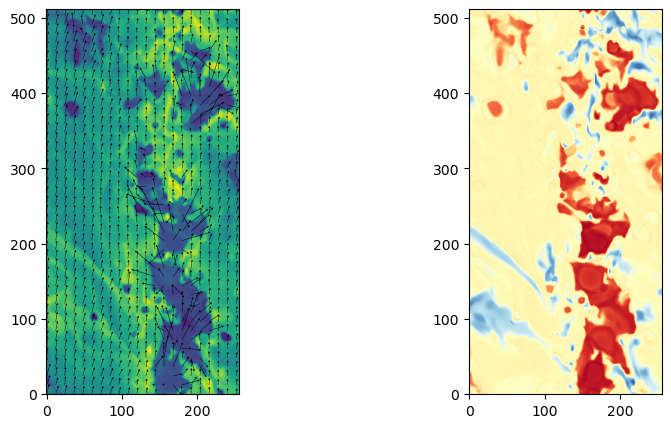

In [31]:
iz = ddata.domain['Nx'][2] // 2
ix = ddata.domain['Nx'][0] // 2
iy = ddata.domain['Nx'][1] // 2

x = d['x']// 8
x = x + 128.
y = d['y']// 8
y = y + 256.


vx=d['vx'][iz,:,:]
vy=d['vy'][iz,:,:]

dn=12
vU=vx[::dn, ::dn]
vV=vy[::dn, ::dn]

#vM = np.hypot(vU,vV)
#q=ax.quiver(d['x'][::dn],d['y'][::dn],vU,vV,scale=3000,linewidths=1.5,headwidth=5)
#ax.quiverkey(q,-1.,0.3,300,label='300 km s$^{-1}$',labelpos='E', coordinates='data',color='r',\
             #fontproperties={'size': 18, 'weight':'bold'},labelcolor='r')


fig, axes = plt.subplots(1, 2, figsize=(10,5))
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)
axes[0].imshow(d['nH'][iz,:,:], norm=LogNorm(), origin='lower')
#axes[0].quiver(x,y,d['vx'][iz,0,:],d['vy'][iz,:,0])
axes[0].quiver(x[::dn],y[::dn],vU,vV,scale=3000,linewidths=1.5,headwidth=5)
axes[1].imshow(d['T'][iz,:,:], norm=LogNorm(), origin='lower', 
               cmap=cmap_temp)

In [32]:
d['x'].shape

(256,)

In [33]:
512*256

131072

In [34]:
dat = ddata.get_field(['density', 'pressure'], as_xarray=True)

In [35]:
dat

<xarray.Dataset>
Dimensions:   (z: 768, y: 512, x: 256)
Coordinates:
  * x         (x) float64 -1.02e+03 -1.012e+03 -1.004e+03 ... 1.012e+03 1.02e+03
  * y         (y) float64 -2.044e+03 -2.036e+03 ... 2.036e+03 2.044e+03
  * z         (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    density   (z, y, x) float32 3.99e-05 4.048e-05 ... 9.599e-05 9.462e-05
    pressure  (z, y, x) float32 3.94 3.957 3.973 3.989 ... 4.087 4.063 4.044
Attributes:
    all_grid_equal:  True
    ngrid:           768
    le:              [-1024. -2048. -3072.]
    re:              [1024. 2048. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [2048. 4096. 6144.]
    center:          [0. 0. 0.]
    Nx:              [256 512 768]
    ndim:            3
    time:            250.0006

In [36]:
dat.x

<xarray.DataArray 'x' (x: 256)>
array([-1020., -1012., -1004., ...,  1004.,  1012.,  1020.])
Coordinates:
  * x        (x) float64 -1.02e+03 -1.012e+03 -1.004e+03 ... 1.012e+03 1.02e+03

In [37]:
help(ddata.get_slice)

Help on method get_slice in module pyathena.io.read_vtk:

get_slice(axis, field='density', pos='c', method='nearest') method of pyathena.io.read_vtk_tar.AthenaDataSetTar instance
    Read slice of fields.
    
    Parameters
    ----------
    axis : str
        Axis to slice along. 'x' or 'y' or 'z'
    field : (list of) str
        The name of the field(s) to be read.
    pos : float or str
        Slice through If 'c' or 'center', get a slice through the domain
        center. Default value is 'c'.
    method : str
    
    
    Returns
    -------
    slc : xarray dataset
        An xarray dataset containing slices.



In [38]:
slc = ddata.get_slice('z', ['nH', 'T', 'pressure'])

In [39]:
slc

<xarray.Dataset>
Dimensions:   (y: 512, x: 256)
Coordinates:
  * x         (x) float64 -1.02e+03 -1.012e+03 -1.004e+03 ... 1.012e+03 1.02e+03
  * y         (y) float64 -2.044e+03 -2.036e+03 ... 2.036e+03 2.044e+03
    z         float64 4.0
Data variables:
    pressure  (y, x) float32 1.986 1.936 1.854 1.712 ... 18.18 15.7 13.33 11.09
    nH        (y, x) float32 0.02307 0.02182 0.02143 ... 0.3606 0.29 0.2296
    T         (y, x) float32 8.268e+03 8.631e+03 ... 6.938e+03 7.26e+03
Attributes:
    all_grid_equal:  True
    ngrid:           768
    le:              [-1024. -2048. -3072.]
    re:              [1024. 2048. 3072.]
    dx:              [8. 8. 8.]
    Lx:              [2048. 4096. 6144.]
    center:          [0. 0. 0.]
    Nx:              [256 512 768]
    ndim:            3
    time:            250.0006
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

In [40]:
slc['x']

<xarray.DataArray 'x' (x: 256)>
array([-1020., -1012., -1004., ...,  1004.,  1012.,  1020.])
Coordinates:
  * x        (x) float64 -1.02e+03 -1.012e+03 -1.004e+03 ... 1.012e+03 1.02e+03
    z        float64 4.0

In [41]:
slc = ddata.get_slice('z', ['nH', 'T', 'pressure','vx','vy'])

In [42]:
slc['vx'][0].shape

(256,)

In [43]:
type(slc), type(slc.nH), type(slc.nH.data)

(xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray, numpy.ndarray)

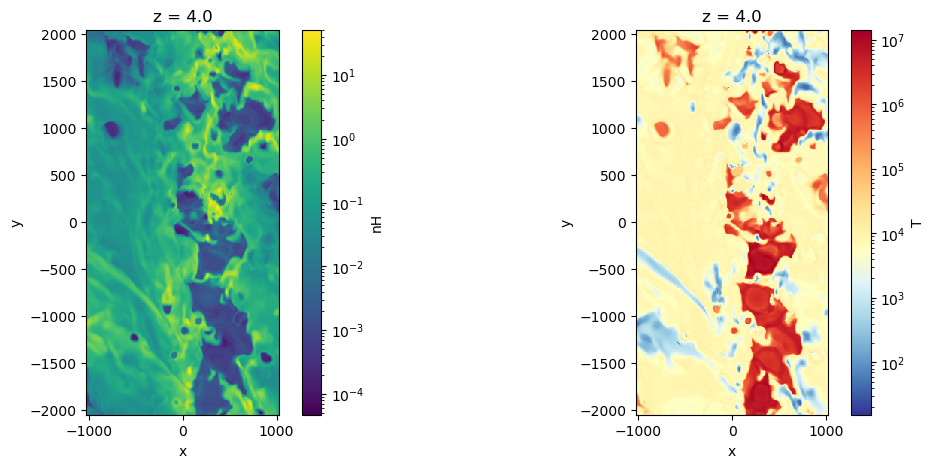

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
im1 = slc['nH'].plot(ax=axes[0], norm=LogNorm())
#im1 = plt.quiver(slc['x'],slc['y'],slc['vx'][0],slc['vx'][1])
im2 = slc['T'].plot(ax=axes[1], norm=LogNorm(), cmap=cmap_temp)
for im in (im1, im2):
    im.axes.set_aspect('equal')

Text(0, 0.5, '$\\log_{10}\\,T$')

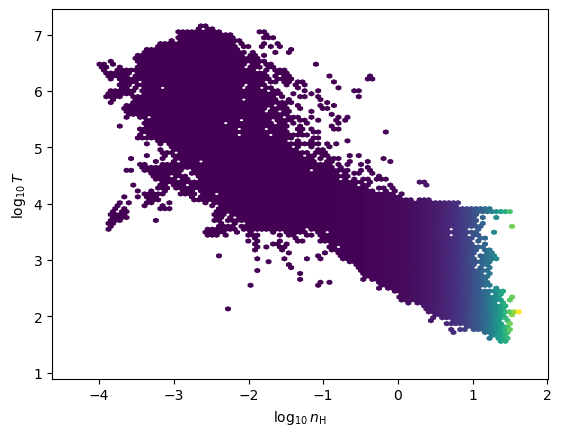

In [45]:
nH = slc['nH'].data.flatten()
lognH = np.log10(nH)
logT = np.log10(slc['T'].data.flatten())
plt.hexbin(lognH, logT, nH, mincnt=1)
plt.xlabel(r'$\log_{10}\,n_{\rm H}$')
plt.ylabel(r'$\log_{10}\,T$')